In [1]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt
import Helper_functions as help

### Oppgave 3 

In [ ]:
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)

def u_exact(x,y,t):
    return np.exp(-5*np.pi**2*t)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

In [ ]:
# test av oppgave 3

tol = 1.e-3
t0 = 0
tf = 0.02
h0 = 0.04 # initial step size in vssi
N = 32
k = 32 # k- rank approx

# def grid
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# def exact soln in t0
u_ex_0 = u_exact(X,Y,t0)
u_ex_f = u_exact(X,Y,tf)

#print(u_ex_0)

# Initialize u and u_dot
m,n = N,N
u0 = tilr.u_fun(g,m,n) 
u_dot = tilr.u_dot_fun(g,m,n)

# specify what method to use
method = tilr.second_order_method

# do method
Y,j = vssi.variable_solver(t0,tf,u0,tol,h0,method,k)

Yt = vssi.format_result(u_dot,Y)

plt.imshow(Yt[-1,:,])
plt.colorbar()


# Oppgave 4

In [21]:
t0 = 0
h = 0.1
tol = 1.e0
k = 5
tf = 6

A0 = ex.A(0)

method = dlr.second_order_method
U_tensor,S_tensor,V_tensor,t_vals = vssi.variable_solver(t0,tf,A0,tol,h,method,k)

Yt,Ut,St,Vt = vssi.format_Yt(A0,U_tensor,S_tensor,V_tensor)

count 0 j 0 t 0 h 0.1 u 2.236 v 2.236 s 13.156 

count 0 j 1 t 0.1 h 0.1 u 2.236 v 2.236 s 13.811 

count 0 j 2 t 0.2 h 0.1 u 2.236 v 2.236 s 14.466 

count 0 j 3 t 0.30000000000000004 h 0.1 u 2.236 v 2.236 s 15.127 

count 0 j 4 t 0.4 h 0.1 u 2.236 v 2.236 s 15.806 

count 0 j 5 t 0.5 h 0.1 u 2.236 v 2.236 s 16.521 

count 0 j 6 t 0.6 h 0.1 u 2.236 v 2.236 s 17.29 

count 0 j 7 t 0.7 h 0.1 u 2.236 v 2.236 s 18.137 

count 0 j 8 t 0.7999999999999999 h 0.1 u 2.236 v 2.236 s 19.082 

count 0 j 9 t 0.8999999999999999 h 0.1 u 2.236 v 2.236 s 20.146 

count 0 j 10 t 0.9999999999999999 h 0.1 u 2.236 v 2.236 s 21.348 

count 0 j 11 t 1.0999999999999999 h 0.1 u 2.236 v 2.236 s 22.703 

count 0 j 12 t 1.2 h 0.1 u 2.236 v 2.236 s 24.228 

count 0 j 13 t 1.3 h 0.1 u 2.236 v 2.236 s 25.937 

count 0 j 14 t 1.4000000000000001 h 0.1 u 2.236 v 2.236 s 27.845 

count 0 j 15 t 1.5000000000000002 h 0.1 u 2.236 v 2.236 s 29.968 

count 0 j 16 t 1.6000000000000003 h 0.1 u 2.236 v 2.236 s 32.324 

count 0 

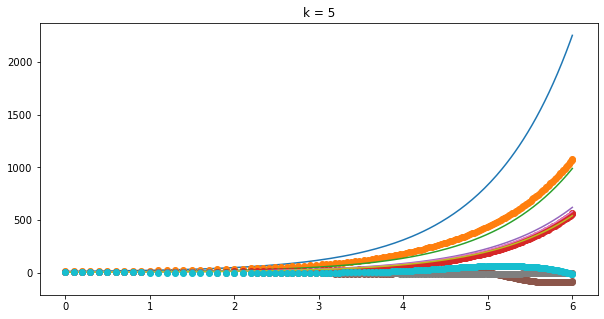

In [25]:
sing_vals_exact = vssi.compute_singular_values(ex.A,k,t_vals)
sing_vals_approx = vssi.extract_singular_values(St)

plt.figure(1,figsize=(10,5))
plt.title("k = 5")
for i in range(len(sing_vals_exact)): 
    plt.plot(t_vals,sing_vals_exact[i])
    plt.plot(t_vals,sing_vals_approx[i][:-1], "o")
plt.show()

In [ ]:
Aend = ex.A(0.2)
plt.imshow(Aend)
plt.colorbar()
plt.show()
plt.imshow(Yt[-1,:,:])
plt.colorbar()
plt.show()

# Oppgave 5

In [18]:
## Oppgave 5
t0 = 0
h = 0.01
tol = 1.e-3
tf = 10
k = 100

A_20 = ex.A_2(t0)

method = dlr.second_order_method2
U_tensor,S_tensor,V_tensor,t_vals = vssi.variable_solver(t0,tf,A_20,tol,h,method,k)

Yt,Ut,St,Vt = vssi.format_Yt(A_20,U_tensor,S_tensor,V_tensor)

# sing_vals_exact = vssi.compute_singular_values(ex.A_2,k,t_vals)
# sing_vals_approx = vssi.extract_singular_values(St)

# plt.figure(1,figsize=(10,5))
# plt.title(f"Singular values as function of time, k = {k}")
# for i in range(len(sing_vals_exact)): 
#     plt.plot(t_vals,sing_vals_exact[i])
#     plt.plot(t_vals[::20],(sing_vals_approx[i][:-1])[::20], "o", markersize = 2.5)
# plt.xlabel("time")
# plt.show()


In [19]:
sing_vals_exact = vssi.compute_singular_values(ex.A_2,k,t_vals)
sing_vals_approx = vssi.extract_singular_values(St)

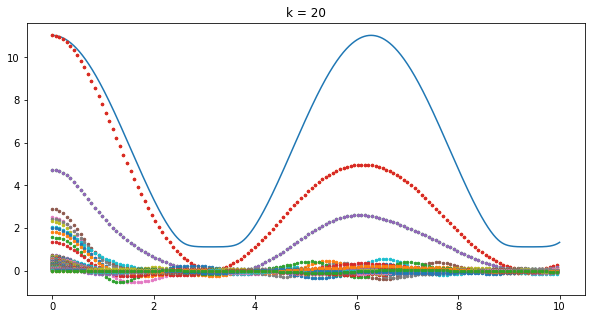

In [20]:

plt.figure(1,figsize=(10,5))
plt.title("k = 20")
#for i in range(len(sing_vals_exact)): 
plt.plot(t_vals,sing_vals_exact[0])
plt.plot(t_vals[::20],sing_vals_approx[0][:-1][::20], "o", markersize = 2.5)
plt.plot(t_vals[::20],sing_vals_approx[1][:-1][::20], "o", markersize = 2.5)
for i in range(100):
    plt.plot(t_vals[::20],sing_vals_approx[i][:-1][::20], "o", markersize = 2.5)

#plt.plot(t_vals,sing_vals_exact[1])
#plt.plot(t_vals,sing_vals_exact[2])
#plt.plot(t_vals,sing_vals_exact[3])




In [58]:
sing_vals_exact = vssi.compute_singular_values(ex.A_2,1,[6])
sing_vals_approx = vssi.extract_singular_values(St)
print(sing_vals_approx)
print(sing_vals_exact)

[[11.15239178 11.15228654 11.15197094 ...  0.20144469  0.20834418
   0.20834418]
 [ 4.89179535  4.89169449  4.89139245 ...  0.32963036  0.33266683
   0.33266683]
 [ 3.0636376   3.06350517  3.06310887 ... -0.02021869 -0.01980767
  -0.01980767]
 [ 2.87000294  2.86992482  2.86969081 ...  0.02861142  0.02875389
   0.02875389]
 [ 2.67511457  2.67499211  2.67462498 ...  0.05721108  0.05735604
   0.05735604]]
[11.15239178]


In [ ]:
t_s = np.linspace(0,10,51)
print(t_s)
sing_vals = vssi.compute_singular_values(ex.A_2,k,t_s)
plt.plot(t_s,sing_vals[0])


A0 = ex.A(0)
s = np.linalg.svd(A0)[1]
print(s)

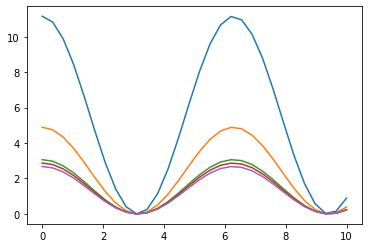

In [3]:
from scipy.linalg import expm

epsilon = 0.1

np.random.seed(1)
A1 = ex.generateA(epsilon)
np.random.seed(2)
A2 = ex.generateA(epsilon)

#
Id =  np.identity(100)

T1 = np.diag(-np.ones(99), k=1) + np.diag(np.ones(99), k=-1)
T2 = np.diag(-np.ones(99)/2, k=1) + np.diag(-np.ones(98), k=2) + np.diag(np.ones(99)/2, k=-1) + np.diag(np.ones(98), k=-2)

Q1 = lambda t :  Id @ expm(t *T1)
Q2 = lambda t :  Id @ expm(t *T2)

func = lambda t :  Q1(t) @ (A1 + np.cos(t) * A2) @ Q2(t).T

t_vals = np.linspace(0,10,30)
k = 5
sing_vals = vssi.compute_singular_values(func,k,t_vals)

for i in range(k):
    plt.plot(t_vals,sing_vals[i])
plt.show()
